<a href="https://colab.research.google.com/github/ab-rohman/Computer_Vision/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from __future__ import print_function
import argparse
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io, img_as_float
import matplotlib.pyplot as plt
from skimage.filters import gaussian
import numpy as np
from PIL import Image

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


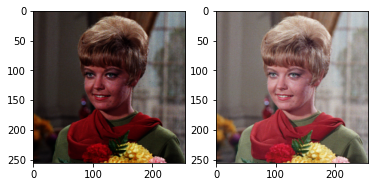

In [ ]:
#Create Gamma Correction
img = cv.imread('/content/drive/MyDrive/Colab Notebooks/Images_PCVK/Images/female.tiff')
img2 = cv.cvtColor(img, cv.COLOR_BGR2RGB)
print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

def gammaCorrection(src, gamma_value):
    invGamma = 1 / gamma_value
 
    table = [((i / 255) ** invGamma) * 255 for i in range(256)]
    table = np.array(table, np.uint8)
 
    return cv.LUT(src, table)
 
gammaImg = gammaCorrection(img2, 2.2)
fig, frame = plt.subplots(1,2)
frame[0].imshow(img2)
frame[1].imshow(gammaImg)

Bit depth
---------------------------------
Masukkan nilai bit depth: 3


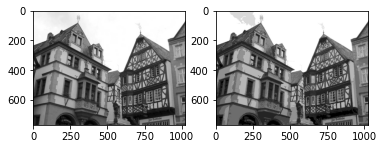

In [4]:
img_2 = cv.imread('/content/drive/MyDrive/Colab Notebooks/Images_PCVK/Images/old_house.jpg')
print('Bit depth')
print('---------------------------------')
try:
  depth = int(input('Masukkan nilai bit depth: '))
except ValueError:
  ('Error, not a number')

def change_depth(img, depth):

  level = 255/((2**depth)-1)
  new_image = np.zeros(img.shape, img.dtype)

  #INI CARANYA NGEAKSES WARNA PIKSEL
  for x in range(img.shape[0]):
    for y in range(img.shape[1]):
      for c in range(img.shape[2]):
        new_image[x,y,c] = np.clip(round(img[x,y,c]/level)*level, 0, 255)

  return new_image;

depth_result = change_depth(img_2, depth)
fig, frame = plt.subplots(1,2)
frame[0].imshow(img_2)
frame[1].imshow(depth_result)

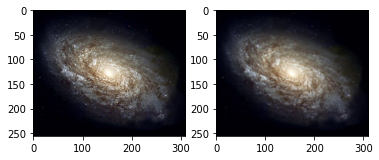

In [ ]:
#Create GaussianBlur
img_4 = img_as_float(io.imread('/content/drive/MyDrive/Colab Notebooks/Images_PCVK/Images/galaxy.jpg'))
mean_denosing = cv.GaussianBlur(img_4, (3,3), 0, borderType=cv.BORDER_CONSTANT)
fig, frame = plt.subplots(1,2)
frame[0].imshow(img_4)
frame[1].imshow(mean_denosing)

(1036, 1354, 3)

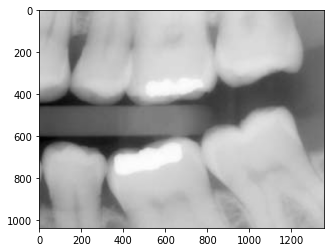

In [ ]:
img_5 = cv.imread('/content/drive/MyDrive/Colab Notebooks/Images_PCVK/Images/teeth.jpg')
#show and find the shape of image 
plt.imshow(img_5)
img_5.shape

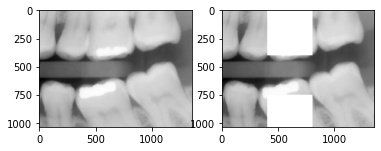

In [ ]:
#Create Or masking
box = np.zeros(img_5.shape, dtype=np.uint8)
#Creating 2 box area for masking
box1 = cv.rectangle(box,(400,0),(800,400),color=(255,255,255),thickness=-1)
box2 = cv.rectangle(box1,(400,750),(800,1036),color=(255,255,255),thickness=-1)
# Doing the bitwise or operation
result_or = cv.bitwise_or(img_5, box2)

fig, frame = plt.subplots(1,2)
frame[0].imshow(img_5)
frame[1].imshow(result_or)

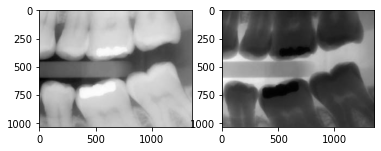

In [ ]:
#Create not masking
box = np.zeros(img_5.shape, dtype=np.uint8)
#Creating 2 box area for masking
box1 = cv.rectangle(box,(400,0),(800,400),color=(255,255,255),thickness=-1)
box2 = cv.rectangle(box1,(400,750),(800,1036),color=(255,255,255),thickness=-1)
# Doing the bitwise or operation
result_or = cv.bitwise_not(img_5, box2)

fig, frame = plt.subplots(1,2)
frame[0].imshow(img_5)
frame[1].imshow(result_or)

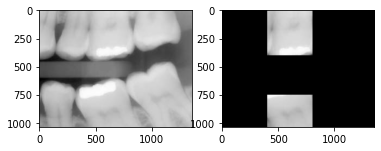

In [ ]:
#Create and masking
box = np.zeros(img_5.shape, dtype=np.uint8)
#Creating 2 box area for masking
box1 = cv.rectangle(box,(400,0),(800,400),color=(255,255,255),thickness=-1)
box2 = cv.rectangle(box1,(400,750),(800,1036),color=(255,255,255),thickness=-1)
# Doing the bitwise and operation
result_or = cv.bitwise_and(img_5, box2)

fig, frame = plt.subplots(1,2)
frame[0].imshow(img_5)
frame[1].imshow(result_or)

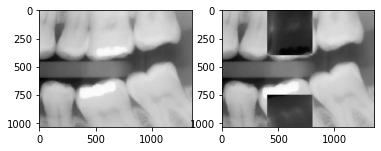

In [ ]:
#Create xor masking
box = np.zeros(img_5.shape, dtype=np.uint8)
#Creating 2 box area for masking
box1 = cv.rectangle(box,(400,0),(800,400),color=(255,255,255),thickness=-1)
box2 = cv.rectangle(box1,(400,750),(800,1036),color=(255,255,255),thickness=-1)
# Doing the bitwise xor operation
result_or = cv.bitwise_xor(img_5, box2)

fig, frame = plt.subplots(1,2)
frame[0].imshow(img_5)
frame[1].imshow(result_or)

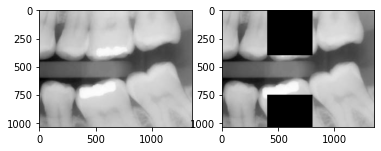

In [ ]:
#Create nand masking
box = np.zeros(img_5.shape, dtype=np.uint8)
#Creating 2 box area for masking
box1 = cv.rectangle(box,(400,0),(800,400),color=(255,255,255),thickness=-1)
box2 = cv.rectangle(box1,(400,750),(800,1036),color=(255,255,255),thickness=-1)
# Doing the bitwise nand operation
result_or = img_5 & ~box2

fig, frame = plt.subplots(1,2)
frame[0].imshow(img_5)
frame[1].imshow(result_or)